In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [59]:
x = np.load('fit_param_data/x.npy')
k = np.load('fit_param_data/k_values.npy')
b = np.load('fit_param_data/b_values.npy')
c = np.load('fit_param_data/c_values.npy')

X = pd.DataFrame(x.T, columns=['log_init_luminance', 'log_sample_luminance'])
X['log_sample_luminance^2'] = X['log_sample_luminance'] ** 2
X = sm.add_constant(X)
X

,const,log_init_luminance,log_sample_luminance,log_sample_luminance^2
0,1.0,8.826070,4.220899,17.815992
1,1.0,8.826070,5.244271,27.502373
2,1.0,8.826070,6.267642,39.283332
3,1.0,8.826070,7.291013,53.158868
4,1.0,8.826070,8.314384,69.128981
...,...,...,...,...
85,1.0,9.631758,10.143443,102.889439
86,1.0,9.631758,11.166814,124.697741
87,1.0,9.631758,12.190185,148.600621
88,1.0,9.631758,13.213557,174.598078


In [61]:
model = sm.OLS(k, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           6.44e-25
Time:                        19:59:36   Log-Likelihood:                -108.05
No. Observations:                  90   AIC:                             224.1
Df Residuals:                      86   BIC:                             234.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4776      0.344     18.840      0.000       5.794       7.161
log_init_luminance        -0.4490      0.052     -8.634      0.000      -0.552      -0.346
log_sample_luminance      -0.7493      0.090     -8.372      0.000      -0.927      -0.571
log_sample_luminance^2     0.0580      0.006      9.983      0.000       0.046       0.070
==============================================================================
Omnibus:                       14.342   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.158
Skew:                           0.669   Prob(JB):                     1.54e-05
Kurtosis:                       5.029   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

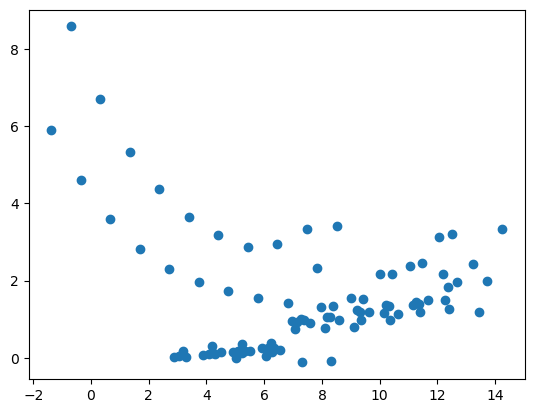

In [62]:
plt.scatter(X['log_sample_luminance'], k);